In [1]:
from methods.config import *
import numpy as np; rnd=np.random.default_rng()
import matplotlib.pyplot as plt; import matplotlib as mpl
import methods.util as util
import pickle
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats
from importlib import reload
#import permutations library
from itertools import permutations, combinations

In [2]:
import methods.shared as shared
sorting = np.argsort(shared.reseq_array.sum(axis=0))[::-1]

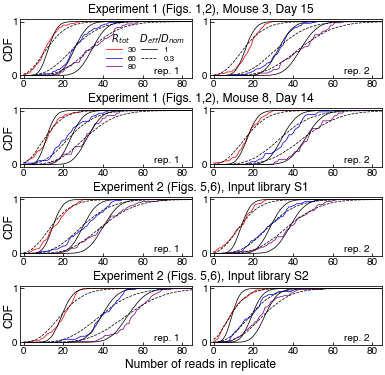

In [12]:
lib_names = [('E1', 3, 15), 
             ('E1', 8, 14), 
             ('E2', 'S1'), 
             ('E2', 'S2')] # each of these have 2 reseq replicates 

figure = plt.figure(figsize=(6.5,6))
gs = figure.add_gridspec(4, 2, hspace=0.5, wspace=0.1)

for row, sample in enumerate(lib_names):
        reseq_indices = [idx for (arr_name, idx) in shared.library_array_map[sample] if arr_name == 'reseq']
        
        row_ax = figure.add_subplot(gs[row, :])
        util.turn_off_ax(row_ax)
        row_ax.set_ylabel('CDF', fontsize=12)
        if len(sample) == 2: ## in vivo
                row_ax.set_title(f'Experiment 2 (Figs. 5,6), Input library {sample[1]}', fontsize=12)
        else:
                row_ax.set_title(f'Experiment 1 (Figs. 1,2), Mouse {sample[1]}, Day {sample[2]}', fontsize=12)
        if row == 3:
                row_ax.set_xlabel('Number of reads in replicate', fontsize=12, labelpad=14)

        for col, (idx1, idx2) in enumerate([reseq_indices, reseq_indices[::-1]]):
                reads1, reads2 = shared.reseq_array[idx1], shared.reseq_array[idx2]
                depth1, depth2 = shared.reseq_depths[idx1][1], shared.reseq_depths[idx2][1]
                summed_reads = reads1 + reads2

                not_runwide_large_barcodes = np.full(len(summed_reads),True)
                not_runwide_large_barcodes[sorting[:500]] = False
                
                rep_frac = depth2 / (depth1 + depth2)

                
                ax = figure.add_subplot(gs[row, col])

                for tot_read_of_bc, color in zip([30, 60, 80], ['red', 'blue', 'purple']):
                        valid_bool = (summed_reads == tot_read_of_bc) & not_runwide_large_barcodes
                        if (summed_reads == tot_read_of_bc).sum() < 20:
                                continue
                        bins = np.arange(0, 2*tot_read_of_bc)
                        density, bins = np.histogram(reads2[summed_reads == tot_read_of_bc], bins=bins,
                                           density=True)
                        empirical_cdf= np.cumsum(density)
                        ax.plot(bins[:-1], empirical_cdf, color=color, label=f'{tot_read_of_bc}')
                        


                        # for alpha, linestyle, label in [(1, 'solid', r'1'), (0.2,'dashed', r'.3')]:
                                # alpha = 0.5
                                # poisson_theory = scipy.stats.poisson.cdf(np.arange(0, 2*tot_read_of_bc+1)*alpha, tot_read_of_bc * alpha*depth2 / (depth1+depth2))
                                # poisson_theory = scipy.stats.poisson.cdf(np.arange(0, 2*tot_read_of_bc+1)*alpha, tot_read_of_bc * alpha)
                                # if tot_read_of_bc != 80:
                                #         label = ''
                                # ax.plot(np.arange(0, 2*tot_read_of_bc+1)[poisson_theory>0], poisson_theory[poisson_theory>0], 
                                #         linestyle=linestyle, color='black', label=label)

                        for alpha, linestyle, label in [(10**10, 'solid', r'1'), (0.3, 'dashed', r'0.3')]:
                                theory_samples = rnd.poisson( rnd.poisson( tot_read_of_bc * rep_frac * alpha, 10**4) / alpha ) 
                                theory_density, bins = np.histogram(theory_samples, bins=bins, density=True)
                                theory_cdf = np.cumsum(theory_density)
                                
                                if tot_read_of_bc != 80:
                                        label = ''
                                ax.plot(bins[:-1], theory_cdf, linestyle=linestyle, color='black', label=label)
                       
                        ax.set_xlim(-2, 85)
                        ax.set_yticks([0, 1])
                        if col == 0 and row == 0:
                               # legend with label vertical spacing =2
                                ax.legend(ncol=2, title='      $R_{tot}$    $D_{eff}/D_{nom}$', 
                                        fontsize=8, title_fontsize=10, columnspacing=0.5, labelspacing=0.1, frameon=False, )

                               
                ax.text(0.78, 0.07, f'rep. {col+1}', transform=ax.transAxes)
                #orient ticks out
                # ax.tick_params(axis='x', direction='out', labelsize=10)
                # ax.tick_params(axis='y', direction='out', labelsize=10)

                                


                # ax.set_title( sample)

        # ax.set_yscale('log')
        # ax.set_ylim(10**-1, 1.5)
plt.rcParams['svg.fonttype'] = 'none'
figure.savefig(f'../figures/sfig_reseq_run_replicate_libraries_noise.svg', format='svg', transparent=True, bbox_inches='tight')
figure.savefig(f'../figures/sfig_reseq_run_replicate_libraries_noise.pdf', transparent=True, bbox_inches='tight')


In [ ]:
lib_names = [('E1', 3, 15), 
             ('E1', 8, 14), 
             ('E2', 'S1'), 
             ('E2', 'S2')] # each of these have 2 reseq replicates 

figure = plt.figure(figsize=(6.5,4))
gs = figure.add_gridspec(2, 4, hspace=0.4, wspace=0.1)

for col, sample in enumerate(lib_names):
        reseq_indices = [idx for (arr_name, idx) in shared.library_array_map[sample] if arr_name == 'reseq']
        
        col_ax = figure.add_subplot(gs[:, col])
        util.turn_off_ax(col_ax)
        col_ax.set_ylabel('CDF', fontsize=12)
        # if len(sample) == 2: ## in vivo
        #         col_ax.set_title(f'Input library {sample[1]}', fontsize=12)
        # else:
        #         col_ax.set_title(f'Experiment 1, Mouse {sample[1]}, Day {sample[2]}')
        # if col == 3:
        #         col_ax.set_xlabel('Number of reads in replicate', fontsize=12, labelpad=14)

        for row, (idx1, idx2) in enumerate([reseq_indices, reseq_indices[::-1]]):
                reads1, reads2 = shared.reseq_array[idx1], shared.reseq_array[idx2]
                depth1, depth2 = shared.reseq_depths[idx1][1], shared.reseq_depths[idx2][1]
                summed_reads = reads1 + reads2

                not_runwide_large_barcodes = np.full(len(summed_reads),True)
                not_runwide_large_barcodes[sorting[:500]] = False
                
                rep_frac = depth2 / (depth1 + depth2)

                
                ax = figure.add_subplot(gs[row, col])

                for tot_read_of_bc, color in zip([30, 60, 80], ['red', 'blue', 'purple']):
                        valid_bool = (summed_reads == tot_read_of_bc) & not_runwide_large_barcodes
                        if (summed_reads == tot_read_of_bc).sum() < 20:
                                continue
                        bins = np.arange(0, 2*tot_read_of_bc)
                        density, bins = np.histogram(reads2[summed_reads == tot_read_of_bc], bins=bins,
                                           density=True)
                        empirical_cdf= np.cumsum(density)
                        ax.plot(bins[:-1], empirical_cdf, color=color, label=f'{tot_read_of_bc}')
                        


                        # for alpha, linestyle, label in [(1, 'solid', r'1'), (0.2,'dashed', r'.3')]:
                                # alpha = 0.5
                                # poisson_theory = scipy.stats.poisson.cdf(np.arange(0, 2*tot_read_of_bc+1)*alpha, tot_read_of_bc * alpha*depth2 / (depth1+depth2))
                                # poisson_theory = scipy.stats.poisson.cdf(np.arange(0, 2*tot_read_of_bc+1)*alpha, tot_read_of_bc * alpha)
                                # if tot_read_of_bc != 80:
                                #         label = ''
                                # ax.plot(np.arange(0, 2*tot_read_of_bc+1)[poisson_theory>0], poisson_theory[poisson_theory>0], 
                                #         linestyle=linestyle, color='black', label=label)

                        for alpha, linestyle, label in [(10**10, 'solid', r'1'), (0.3, 'dashed', r'0.3')]:
                                theory_samples = rnd.poisson( rnd.poisson( tot_read_of_bc * rep_frac * alpha, 10**4) / alpha ) 
                                theory_density, bins = np.histogram(theory_samples, bins=bins, density=True)
                                theory_cdf = np.cumsum(theory_density)
                                
                                if tot_read_of_bc != 80:
                                        label = ''
                                ax.plot(bins[:-1], theory_cdf, linestyle=linestyle, color='black', label=label)
                       
                        ax.set_xlim(-2, 85)
                        ax.set_yticks([0, 1])
                        
                        if row == 0 and col == 0:
                               # legend with label vertical spacing =2
                                ax.legend(ncol=2, title='      $r_{tot}$    $D_{eff}/D_{nom}$', 
                                        fontsize=8, title_fontsize=10, columnspacing=0.5, labelspacing=0.1, frameon=False, )
                        if row == 0:
                                if len(sample) == 2:
                                        ax.set_title(f'Input library {sample[1]}', fontsize=10)
                                else:
                                        ax.set_title(f'Exp. 1, Mouse {sample[1]}, Day {sample[2]}', fontsize=10)
                        if row == 1:
                                ax.set_xlabel('Number of reads in replicate', fontsize=12, labelpad=14)
                        if col == 0:
                                ax.set_ylabel('CDF')


                               
                ax.text(0.78, 0.07, f'(rep. {row+1})', transform=ax.transAxes)
                #orient ticks out
                # ax.tick_params(axis='x', direction='out', labelsize=10)
                # ax.tick_params(axis='y', direction='out', labelsize=10)

                                


                # ax.set_title( sample)

        # ax.set_yscale('log')
        # ax.set_ylim(10**-1, 1.5)
plt.rcParams['svg.fonttype'] = 'none'
figure.savefig(f'../figures/sfig_reseq_run_replicate_libraries_noise.svg', format='svg', transparent=True, bbox_inches='tight')
figure.savefig(f'../figures/sfig_reseq_run_replicate_libraries_noise.pdf', transparent=True, bbox_inches='tight')


E2 5 50


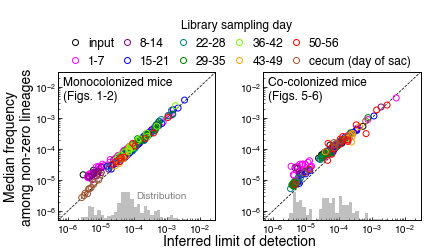

In [8]:
reload(shared)
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10

fig = plt.figure(figsize=(6.5,4))
gs = plt.GridSpec(2, 2, height_ratios=(1,3), width_ratios=[1,1], wspace=0.3, figure=fig)
outer_ax = fig.add_subplot(gs[1, :])
util.turn_off_ax(outer_ax)
outer_ax.set_xlabel('Inferred limit of detection', fontsize=14, labelpad=14)
outer_ax.set_ylabel('Median frequency\namong non-zero lineages', fontsize=14, labelpad=24)


cmap = {day+7*week: color for day in range(1,8) for week, color in enumerate(['fuchsia', 'purple', 'blue', 'teal', 'green', 'lawngreen', 'orange', 'red'])}
cmap['cecum'] = 'sienna'
cmap[0] = 'black'
legend_markers = [plt.Line2D([0], [0], marker='o', linestyle='none', mec=color, mfc='none') \
                  for week, color in enumerate(['black', 'fuchsia', 'purple', 'blue', 'teal', 'green', 'lawngreen', 'orange', 'red', 'sienna'])]
legend_ax = fig.add_subplot(gs[0, :])
util.turn_off_ax(legend_ax)
legend_ax.legend(legend_markers, ['input']+[f'{1+7*week}-{7*(week+1)}' for week in range(0,8)] + ['cecum (day of sac)'], title='Library sampling day', title_fontsize=12,
                  loc=(0.0, -0.4), ncol=5, fontsize=12, frameon=False, columnspacing=0.05, handletextpad=0.1)


E1_ax = fig.add_subplot(gs[1, 0])
E2_ax = fig.add_subplot(gs[1,1])

E1_ax.text(0.03, 0.97, 'Monocolonized mice\n(Figs. 1-2)', transform=E1_ax.transAxes, va='top', fontsize=12)
E2_ax.text(0.03, 0.97, 'Co-colonized mice\n(Figs. 5-6)', transform=E2_ax.transAxes, va='top', fontsize=12)

P1_index, P2_index = 0, 1
# P1_freqs = shared.freq_array[P1_index]
# P2_freqs = shared.freq_array[P2_index]
# median_P1 = np.median(P1_freqs[P1_freqs > 0])
# median_P2 = np.median(P2_freqs[P2_freqs > 0])

x, y = [], []
w, z = [], []

# lib_Deff = {}
# vivo_Deff_array = np.full(shared.read_array.shape[0], 0)

frac_low_diversity = []
for lib, reps in shared.library_array_map.items():
    expt = lib[0]
    mouse = lib[1]

    if expt not in ['E1', 'E2']: #vivo libraries first
        continue
    if len(lib) == 3 and (lib[2] == 0 or lib[2]=='smallint' or (expt == 'E2' and lib[1] > 10 and lib[2] == 14)): #skip
        continue

    if len(lib) == 2:
        day = 0
    else:
        day = lib[2]
    
    
    for (arr_name, index) in reps:
        if arr_name == 'reseq':
            continue

        reads, (D_nom, D_det) = shared.barcode_arrays[arr_name][0][index], shared.barcode_arrays[arr_name][1][index]
            
        freq_array = shared.calc_freqs(reads, D_nom)
        median_nonzero_freq_in_lib = np.median(freq_array[freq_array > 0])
        if 1/D_det < 1e-6 and expt == 'E2':
            print(lib, median_nonzero_freq_in_lib, 1/D_det)

        if expt == 'E1':
            E1_ax.scatter(1/D_det, median_nonzero_freq_in_lib, marker='o', facecolors='none', edgecolors=cmap[day])
            x.append(1/D_det)

        if expt == 'E2' and mouse not in [5, 10, 15]: #exclude low-diversity mice for clarity
            E2_ax.scatter(1/D_det, median_nonzero_freq_in_lib, marker='o', facecolors='none', edgecolors=cmap[day] )
            y.append(1/D_det)

        if median_nonzero_freq_in_lib < 0.01 * 1/D_det:
            print(expt, mouse, day)



E1_ax_dist = E1_ax.twinx()
E1_ax_dist.hist(x, bins=np.logspace(-6, -2, 41), color='grey', alpha=0.5, density=False, histtype='stepfilled', lw=0)
E2_ax_dist = E2_ax.twinx()
E2_ax_dist.hist(y, bins=np.logspace(-6, -2, 41), color='grey', alpha=0.5, density=False, histtype='stepfilled', lw=0)
for dist_ax in [E1_ax_dist, E2_ax_dist]:
    dist_ax.set_yticks([])
    dist_ax.set_ylim(dist_ax.get_ylim()[0], dist_ax.get_ylim()[1]*5)
E1_ax_dist.text(0.5, 0.15, "Distribution", transform=E1_ax_dist.transAxes, ha='left', color='grey', fontsize=10)

for i, ax in enumerate([E1_ax, E2_ax]):
    util.plot_diagonal(ax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(0.5*10**-6, 3*10**-2)
    ax.set_ylim(0.5*10**-6, 3*10**-2)
    ax.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2])

# E1_ax.axhspan(median_P1, median_P2, color='grey', alpha=0.4, lw=0)
# E2_day0_freqs = shared.freq_array[2:6]
# E2_day0_median = [np.median(day0_freqs[day0_freqs > 0]) for day0_freqs in E2_day0_freqs]
# E2_ax.axhspan(np.min(E2_day0_median), np.max(E2_day0_median), color='grey', alpha=0.4, lw=0)

fig.savefig(f'{plot_dir}/sfig_umi_dereplication.pdf')
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig(f'../figures/sfig_umi_dereplication.svg', format='svg', transparent=True, bbox_inches='tight')
fig.savefig(f'../figures/sfig_umi_dereplication.pdf', transparent=True, bbox_inches='tight')

In [135]:
x = shared.reseq_array[211]
S2_focus = shared.barcode_pool_assignments['S2'][1]
ambiguous = shared.barcode_pool_assignments['E2_ambiguous'][1]
ambig_x = x[ambiguous]
print(ambig_x.sum())
print(x[S2_focus].sum())


3749
762272


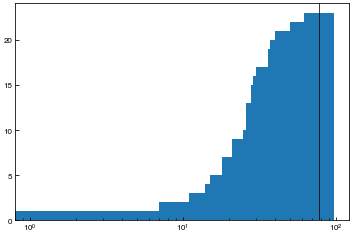

In [26]:
fig, ax = plt.subplots()
# ax.hist(summed_reads, bins=np.logspace(1, 5, 51))
ax.axvline(np.median(summed_reads[summed_reads > 0]), color='black')

valid_bool = (summed_reads == np.median(summed_reads[summed_reads > 0])) & not_runwide_large_barcodes
ax.hist(reads2[valid_bool], bins=np.arange(1.25*np.median(summed_reads[summed_reads > 0])+1), cumulative=True)


ax.set_xscale('log')

TOT READS OF BC: 34.0
TOT READS OF BC: 34.0
TOT READS OF BC: 45.0
TOT READS OF BC: 45.0
TOT READS OF BC: 31.0
TOT READS OF BC: 31.0
TOT READS OF BC: 22.0
TOT READS OF BC: 22.0
TOT READS OF BC: 19.0
TOT READS OF BC: 19.0
TOT READS OF BC: 41.0
TOT READS OF BC: 41.0
TOT READS OF BC: 29.0
TOT READS OF BC: 29.0
TOT READS OF BC: 27.0
TOT READS OF BC: 27.0
TOT READS OF BC: 22.0
TOT READS OF BC: 22.0
TOT READS OF BC: 25.0
TOT READS OF BC: 25.0
TOT READS OF BC: 28.0
TOT READS OF BC: 28.0
TOT READS OF BC: 26.0
TOT READS OF BC: 26.0
TOT READS OF BC: 25.0


/var/folders/x3/8f6xdlhn4hscmskkzs52dycc0000gn/T/ipykernel_85797/377783033.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


TOT READS OF BC: 25.0
TOT READS OF BC: 22.0
TOT READS OF BC: 22.0
TOT READS OF BC: 28.0
TOT READS OF BC: 28.0
TOT READS OF BC: 24.0
TOT READS OF BC: 24.0
TOT READS OF BC: 29.0
TOT READS OF BC: 29.0
TOT READS OF BC: 44.5
TOT READS OF BC: 44.5
TOT READS OF BC: 54.0
TOT READS OF BC: 54.0
TOT READS OF BC: 42.0
TOT READS OF BC: 42.0
TOT READS OF BC: 49.0
TOT READS OF BC: 49.0
TOT READS OF BC: 47.5
TOT READS OF BC: 47.5
TOT READS OF BC: 36.0
TOT READS OF BC: 36.0
TOT READS OF BC: 40.0
TOT READS OF BC: 40.0
TOT READS OF BC: 43.0
TOT READS OF BC: 43.0
TOT READS OF BC: 82.0
TOT READS OF BC: 82.0
TOT READS OF BC: 105.0
TOT READS OF BC: 105.0
TOT READS OF BC: 74.0
TOT READS OF BC: 74.0
TOT READS OF BC: 76.0
TOT READS OF BC: 76.0
TOT READS OF BC: 98.0
TOT READS OF BC: 98.0
TOT READS OF BC: 112.0
TOT READS OF BC: 112.0
TOT READS OF BC: 70.0
TOT READS OF BC: 70.0
TOT READS OF BC: 99.0
TOT READS OF BC: 99.0
TOT READS OF BC: 5209.0
TOT READS OF BC: 5209.0
TOT READS OF BC: 5247.0
TOT READS OF BC: 5247.

ValueError: arange: cannot compute length

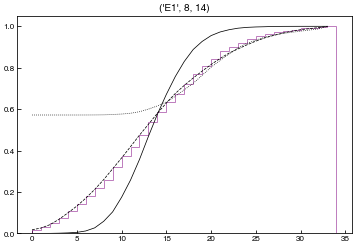

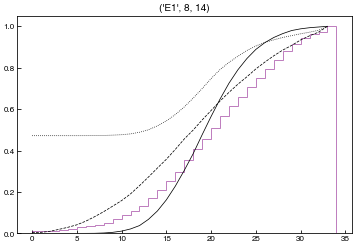

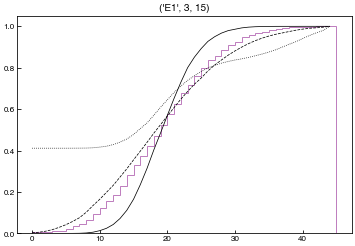

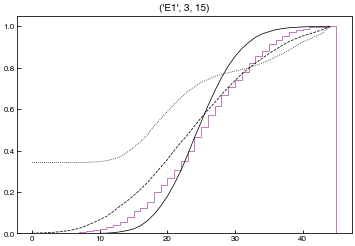

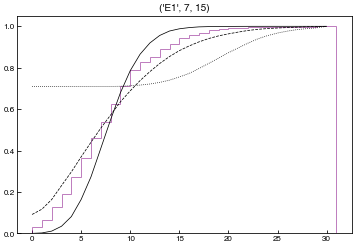

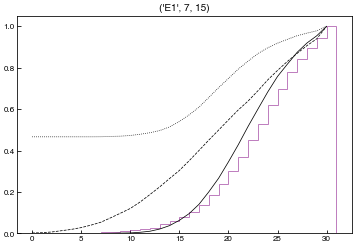

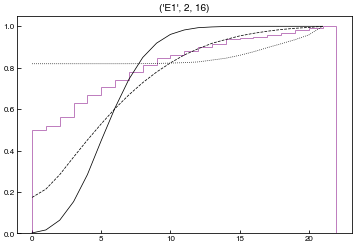

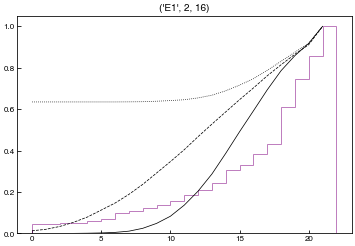

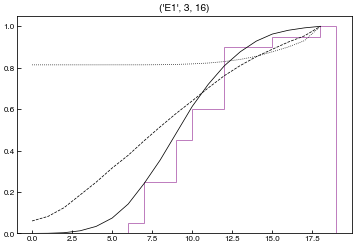

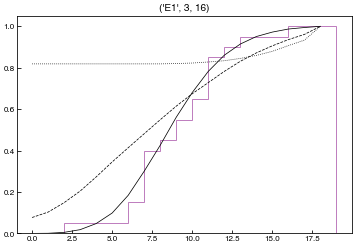

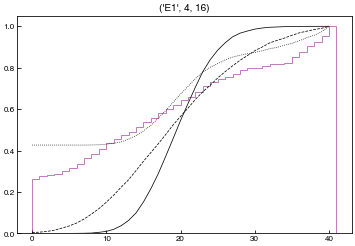

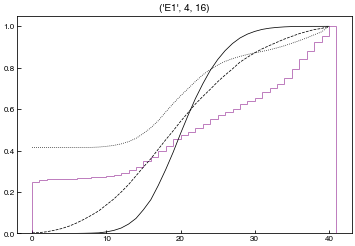

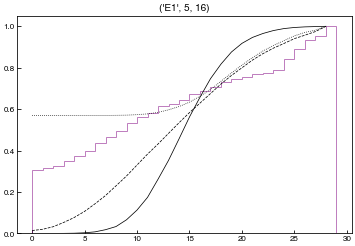

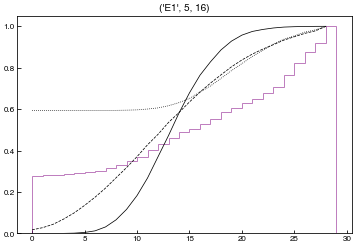

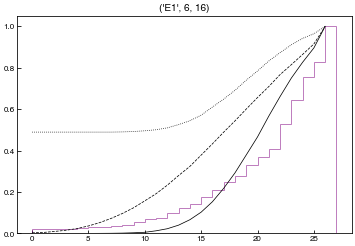

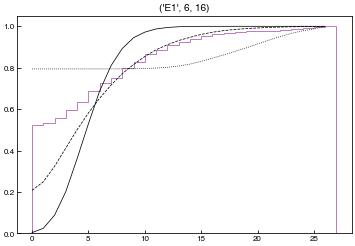

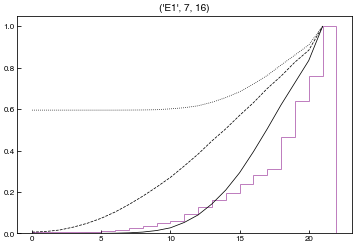

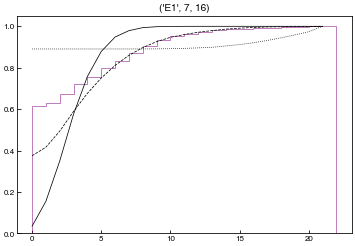

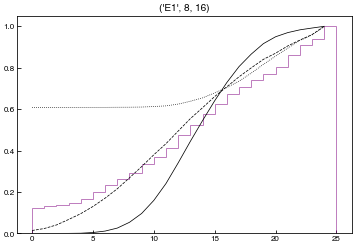

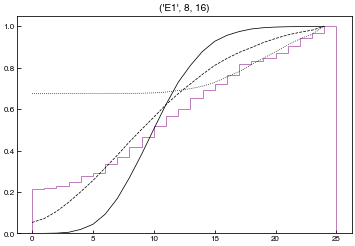

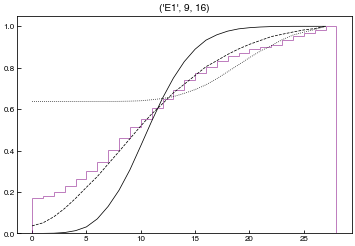

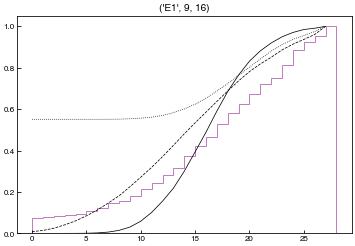

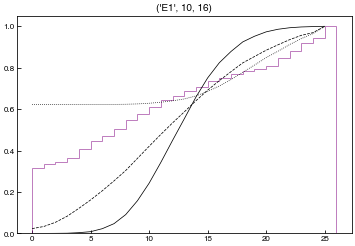

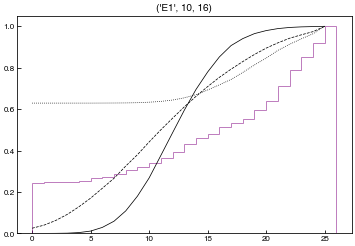

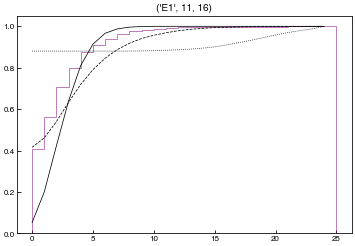

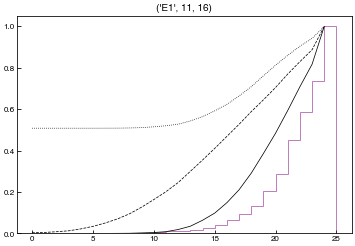

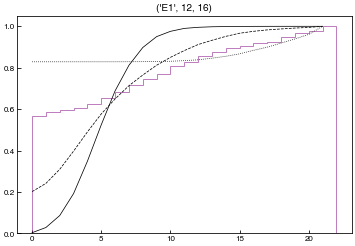

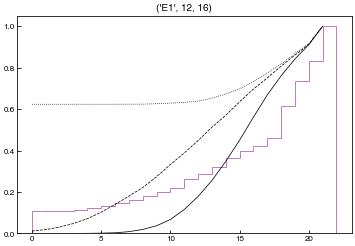

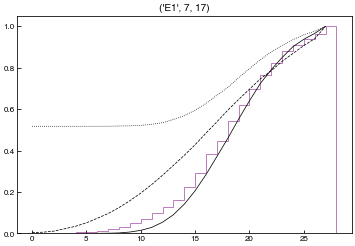

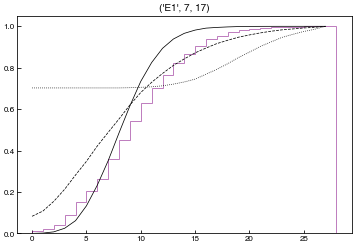

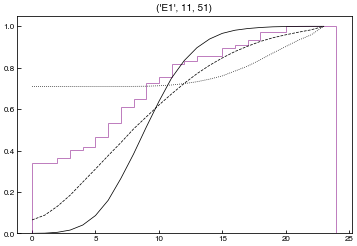

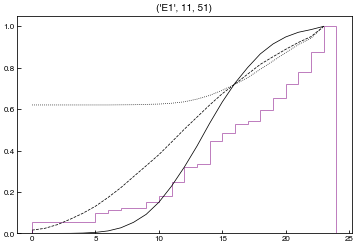

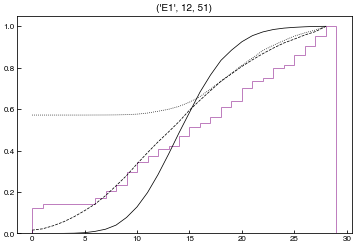

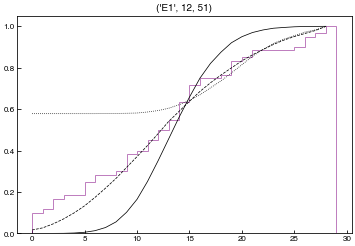

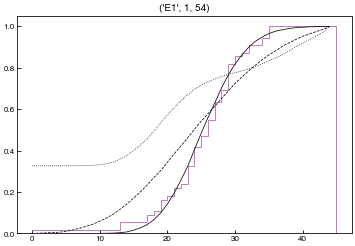

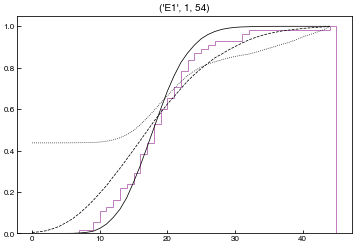

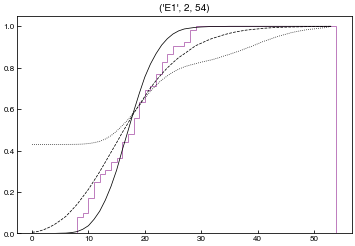

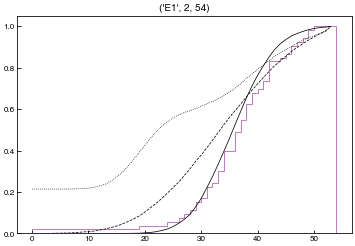

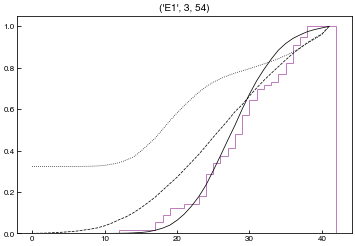

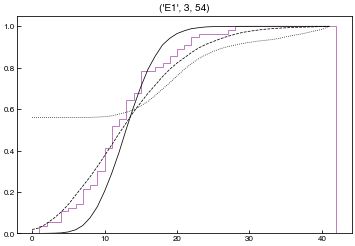

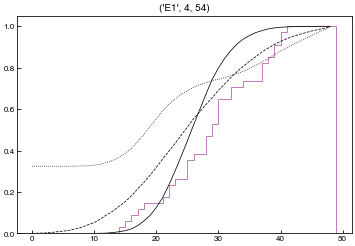

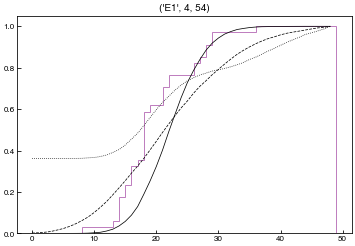

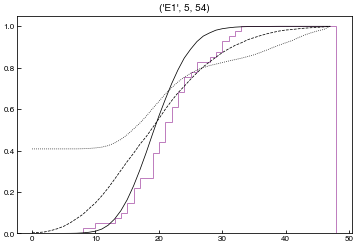

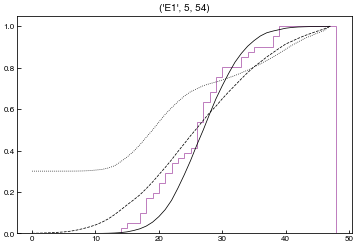

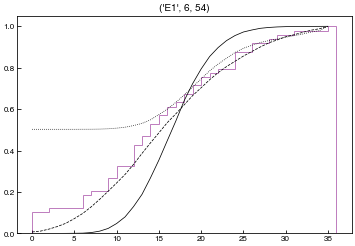

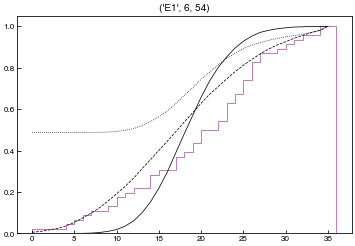

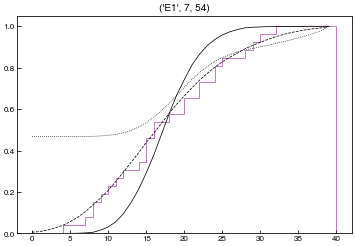

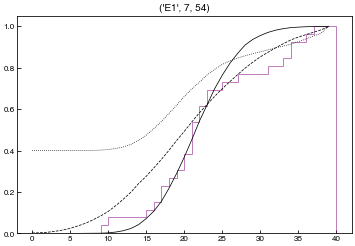

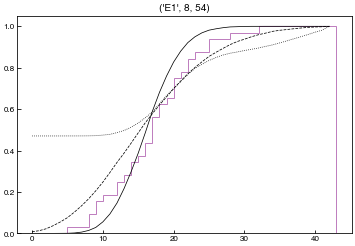

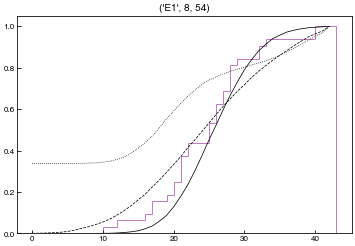

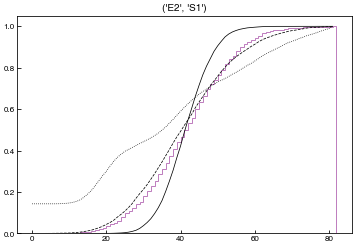

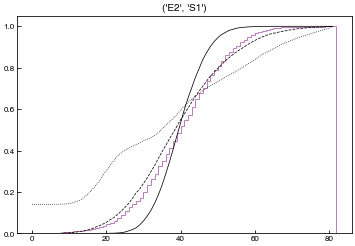

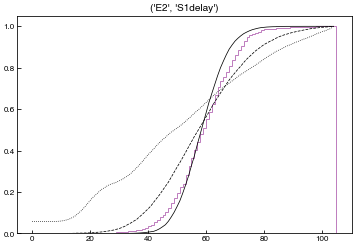

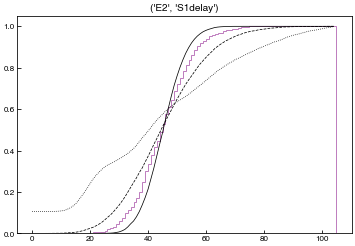

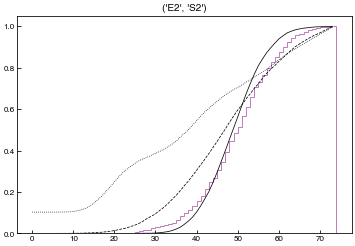

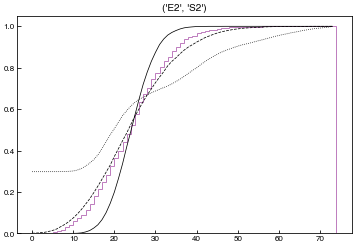

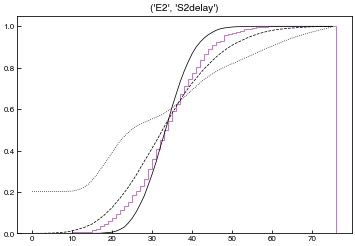

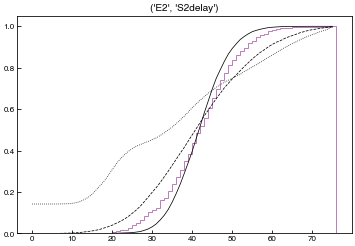

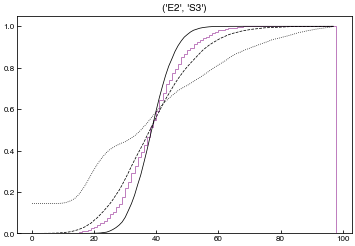

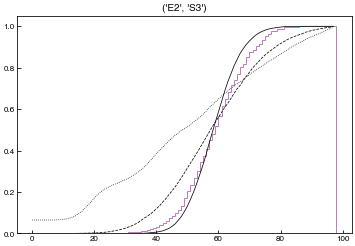

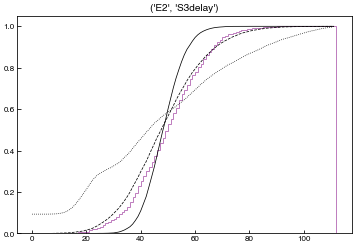

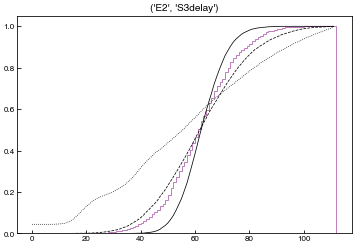

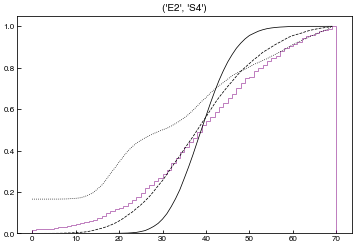

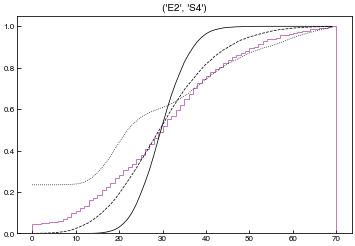

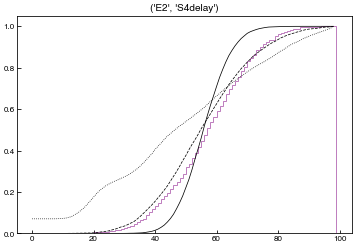

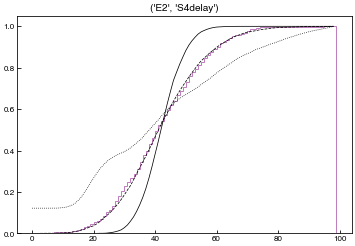

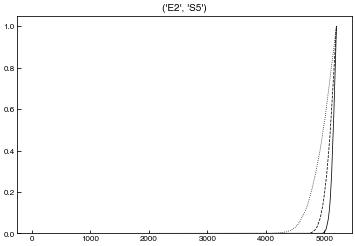

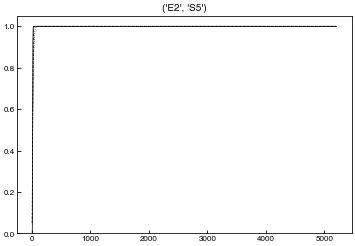

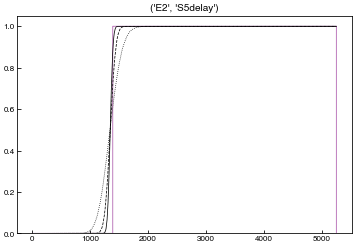

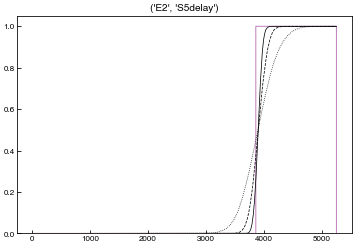

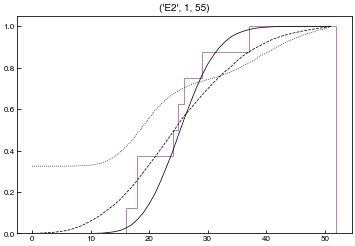

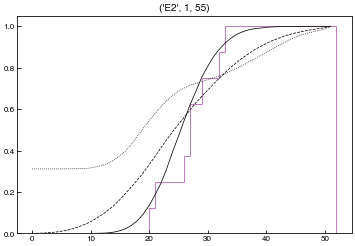

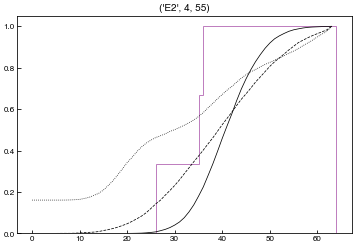

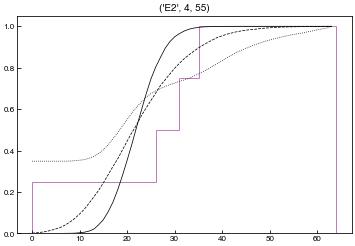

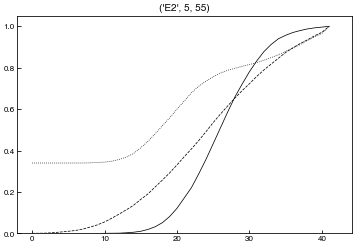

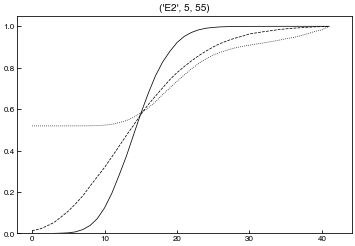

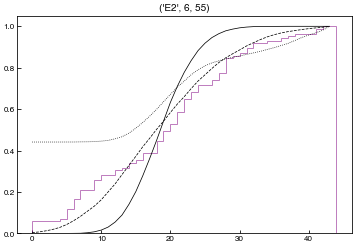

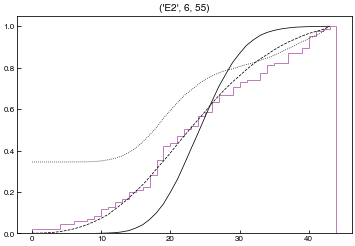

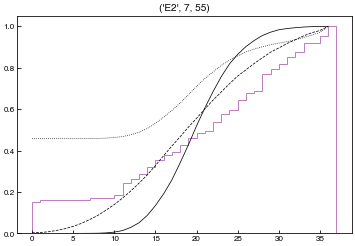

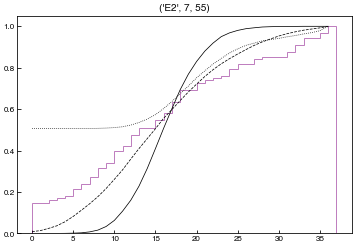

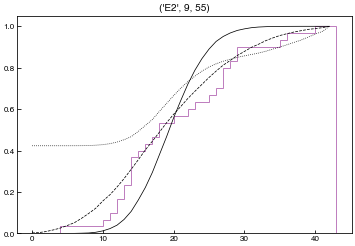

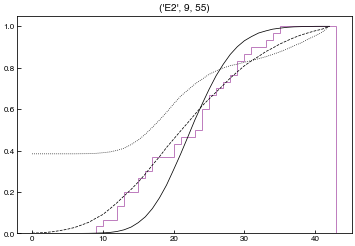

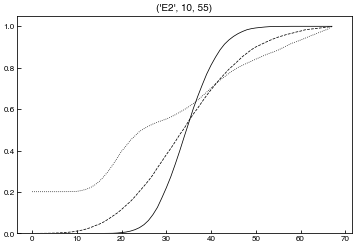

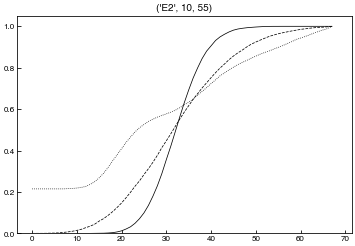

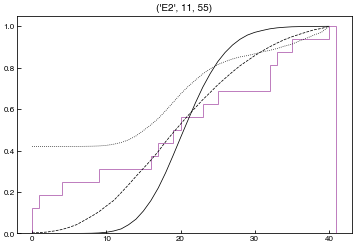

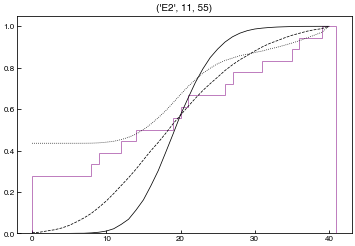

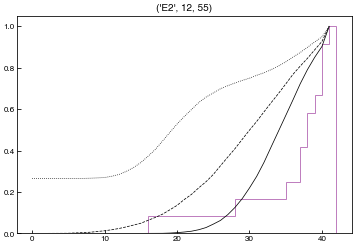

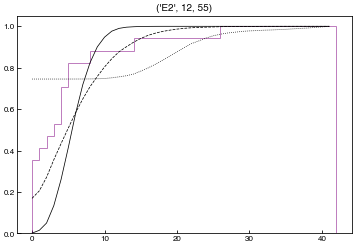

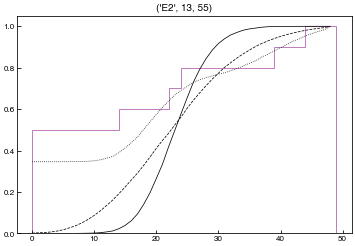

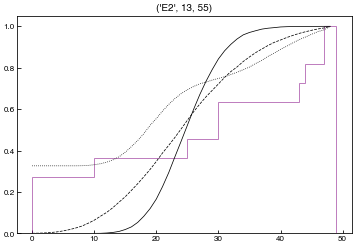

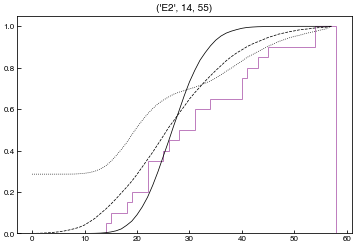

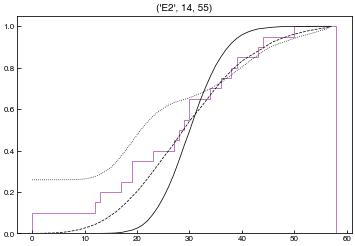

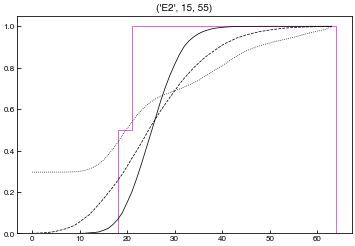

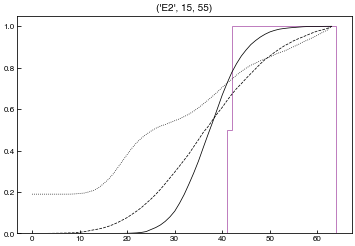

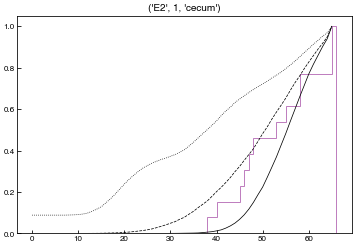

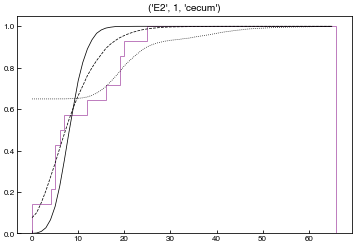

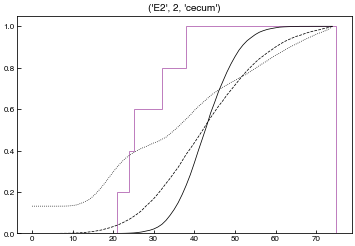

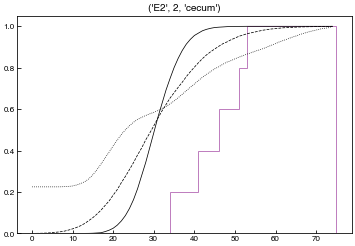

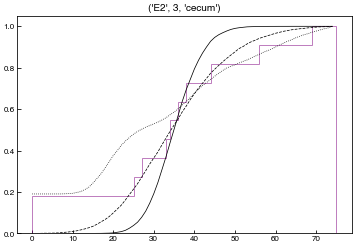

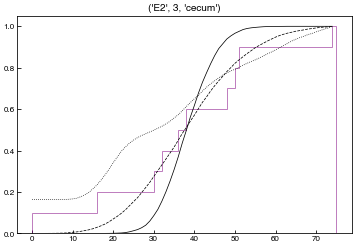

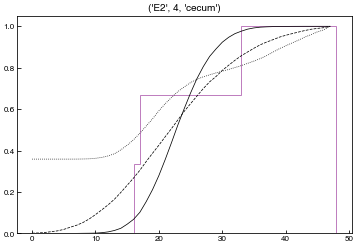

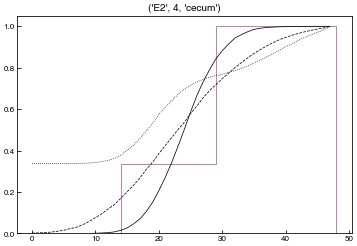

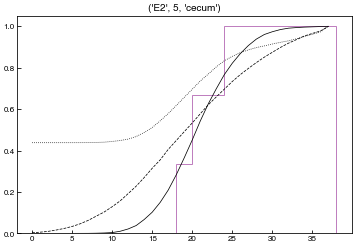

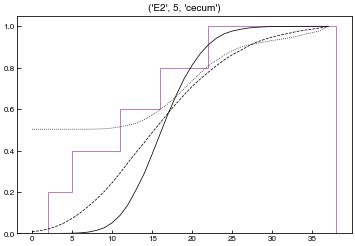

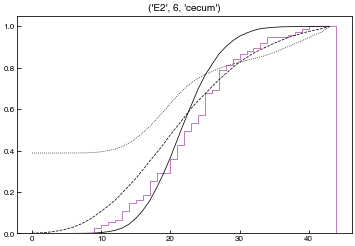

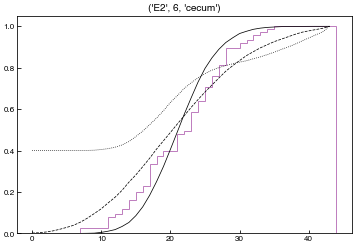

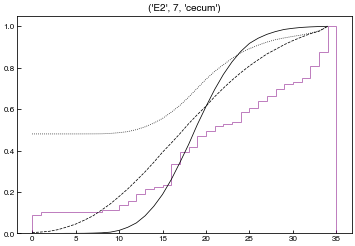

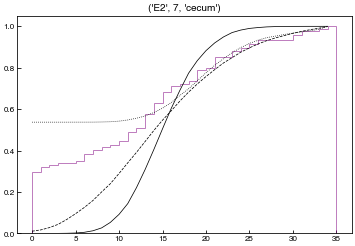

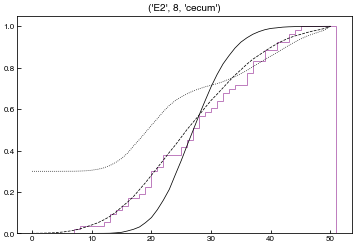

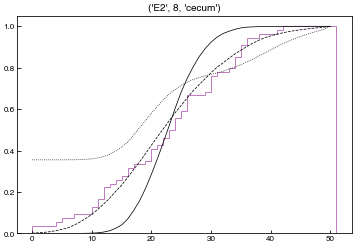

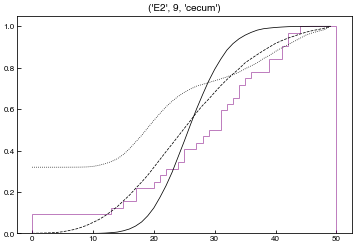

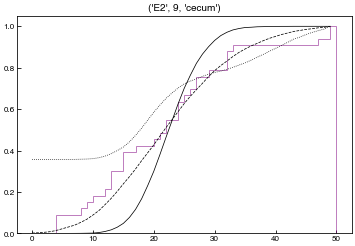

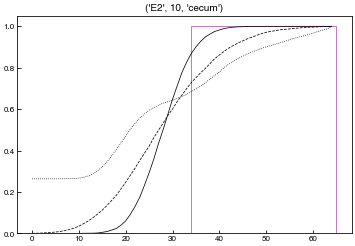

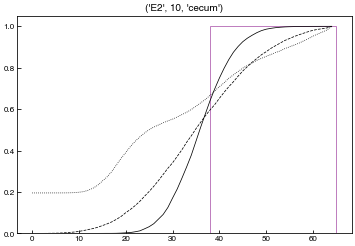

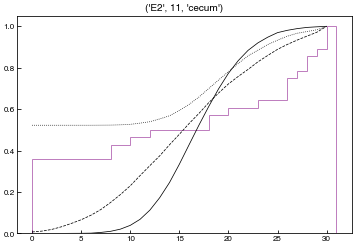

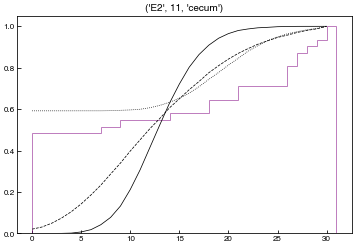

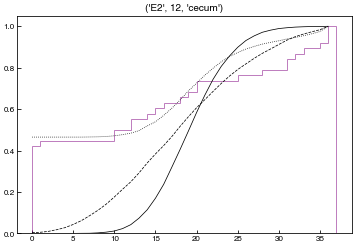

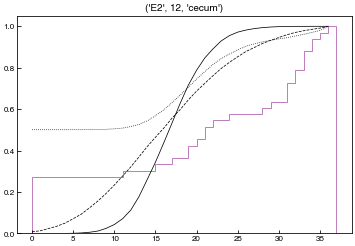

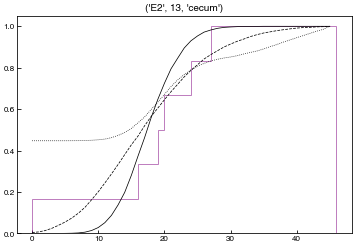

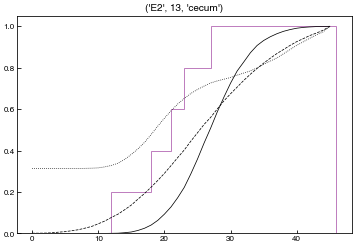

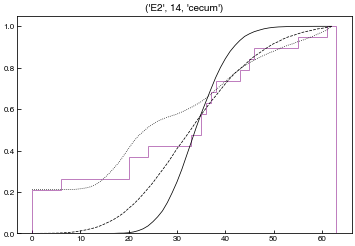

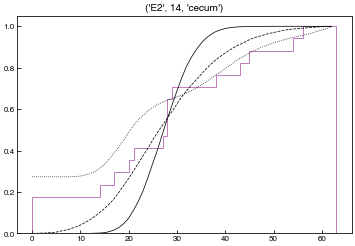

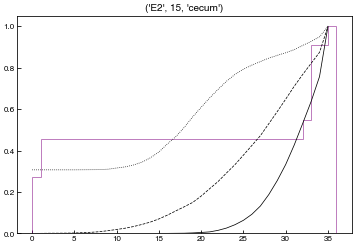

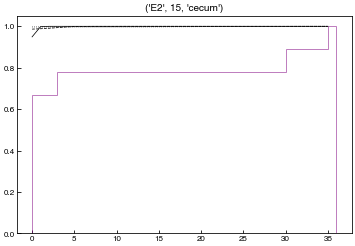

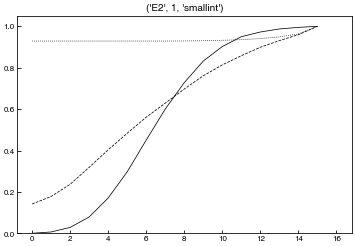

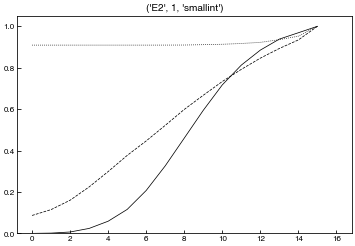

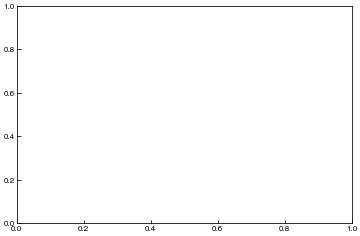

In [156]:
import methods.shared as shared
#Prob_detected = a/b; 
#Variance = 2ab
rep_count = 0 
for sample, replicates in shared.library_array_map.items():
        # if len(sample) != 2:
        #         continue

        if len(sample) == 3 and (sample[2] == 0 or (sample[0]=='E2' and sample[1] > 10 and sample[2] == 14)):
                continue


        reseq_indices = [idx for (arr_name, idx) in replicates if arr_name == 'reseq']
        if len(reseq_indices) != 2:
                continue
        rep_count += 1

        for idx1, idx2 in [reseq_indices, reseq_indices[::-1]]:
                # for idx1, idx2 in [(211, 212), (215, 216), (219, 220), (221, 222)]:
                # idx1, idx2 = 211, 212
                # idx1, idx2 = 215, 216
                # idx1, idx2 = 219,220
                # idx1, idx2 = 221, 222
                reads1, reads2 = shared.reseq_array[idx1], shared.reseq_array[idx2]
                depth1, depth2 = shared.reseq_depths[idx1][1], shared.reseq_depths[idx2][1]
                summed_reads = reads1 + reads2

                not_runwide_large_barcodes = np.full(len(summed_reads),True)
                not_runwide_large_barcodes[sorting[:500]] = False

                # if (summed_reads == 30).sum() < 20:
                #         continue


                fig, ax = plt.subplots()
                center = np.median(summed_reads[summed_reads > 10])
                print("TOT READS OF BC:", center)
                valid_bool = (summed_reads > center -np.sqrt(center)) & (summed_reads < center +np.sqrt(center)) & not_runwide_large_barcodes
                # print(valid_bool.sum(), reads2[valid_bool])
                bins = np.arange(center+1)
                ax.hist(reads2[valid_bool], bins=bins,
                        alpha=0.5, label='Reads1', cumulative=True, histtype='step', density=True, color=color)
                
                rep_frac = depth2 / (depth1 + depth2)
                for alpha, linestyle in [(10**10, 'solid'), (0.3,'dashed'), (0.05, 'dotted')]:
                        # poisson_theory = scipy.stats.poisson.cdf(np.arange(0, center+1)*alpha, center * alpha*depth2 / (depth1+depth2))


                        # ax.plot(np.arange(0, center+1)[poisson_theory>0], poisson_theory[poisson_theory>0], 
                        #         label='Poisson theory', linestyle=linestyle, color='black')

                        theory_samples = rnd.poisson( rnd.poisson( center * rep_frac * alpha, 10**4) / alpha ) 
                        theory_density, bins = np.histogram(theory_samples, bins=bins, density=True)
                        theory_cdf = np.cumsum(theory_density)
                        
                        if tot_read_of_bc != 80:
                                label = ''
                        ax.plot(bins[:-1], theory_cdf, linestyle=linestyle, color='black', label=label)

                # for tot_read_of_bc, color in zip([30, 60, 100, 'median'], ['red', 'blue', 'orange', 'purple']):
                #         if tot_read_of_bc == 'median': #
                #                 center = np.median(summed_reads[summed_reads > 0])
                #                 if center < 30:
                #                         continue
                #                 print("TOT READS OF BC:", center)
                #                 valid_bool = (summed_reads > center -np.sqrt(center)) & (summed_reads < center +np.sqrt(center)) & not_runwide_large_barcodes
                #                 # print(valid_bool.sum(), reads2[valid_bool])
                #                 ax.hist(reads2[valid_bool], bins=np.arange(center+1),
                #                         alpha=0.5, label='Reads1', cumulative=True, histtype='step', density=True, color=color)

                #         #         for alpha, linestyle in [(1, 'solid'), (0.3,'dashed'), (0.1, 'dotted')]:
                #         #                 # alpha = 0.5
                #         #                 poisson_theory = scipy.stats.poisson.cdf(np.arange(0, tot_read_of_bc+1)*alpha, tot_read_of_bc * alpha*depth2 / (depth1+depth2))

                #         #                 ax.plot(np.arange(0, tot_read_of_bc+1)[poisson_theory>0], poisson_theory[poisson_theory>0], 
                #         #                         label='Poisson theory', linestyle=linestyle, color='black')
                #         else:
                #                 valid_bool = (summed_reads == tot_read_of_bc) & not_runwide_large_barcodes
                #                 if valid_bool.sum() < 20:
                #                         continue

                        
                ax.set_title( sample)

        # ax.set_yscale('log')
        # ax.set_ylim(10**-1, 1.5)

print(rep_count)

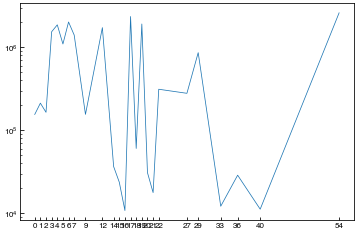

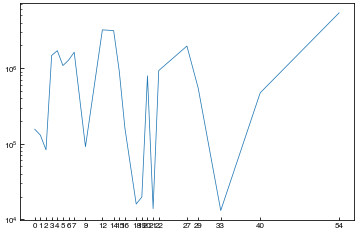

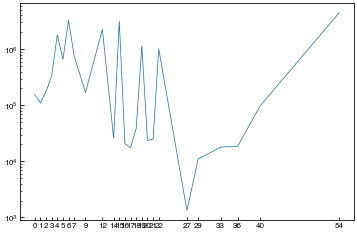

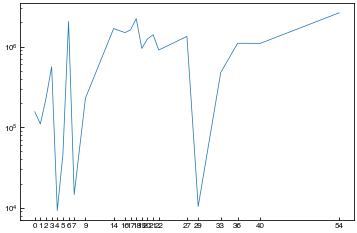

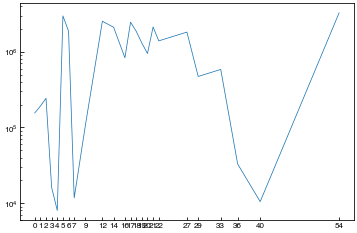

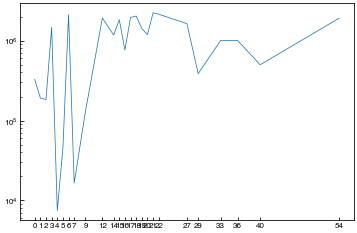

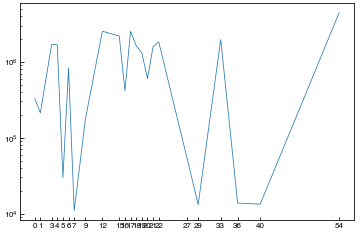

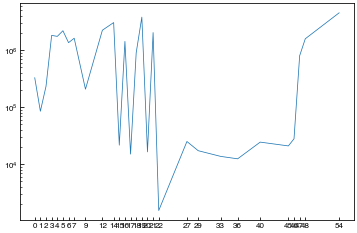

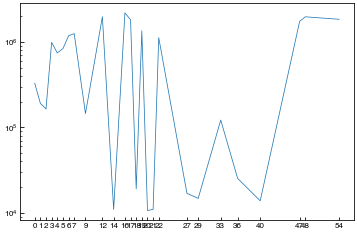

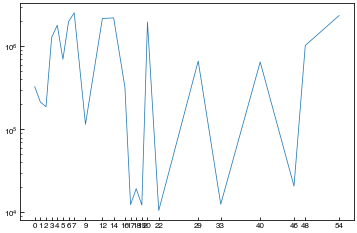

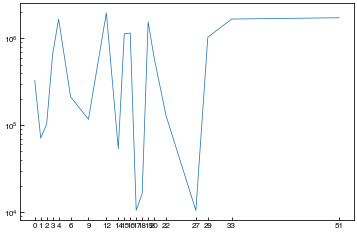

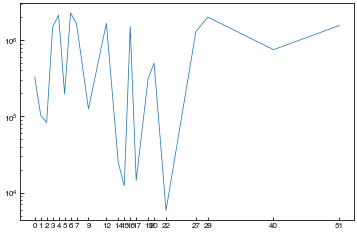

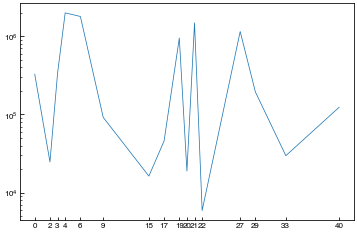

In [178]:
expt = 'E1'
for mouse in range(1,14):
    fig, ax = plt.subplots()

    plot_days, mouse_reads, mouse_depths = shared.get_mouse_timecourse(expt, mouse)
    ax.set_xticks(plot_days)
    ax.plot(plot_days, mouse_depths)
    ax.set_yscale('log')